<a href="https://www.kaggle.com/code/imranktk/prediction-through-machine-learning?scriptVersionId=91366570" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/world-per-capita-electricity-consumption/World_Per_Capita_Electricity_Consumption.csv


In [3]:
df = pd.read_csv("../input/world-per-capita-electricity-consumption/World_Per_Capita_Electricity_Consumption.csv")
df.head()

,Entity,Year,Per capita electricity (kWh)
0,Afghanistan,2000,22.474
1,Afghanistan,2001,27.399
2,Afghanistan,2002,30.397
3,Afghanistan,2003,39.652
4,Afghanistan,2004,36.155


In [4]:
df.rename(columns={'Entity':"Country"},inplace=True)
df.head()

,Country,Year,Per capita electricity (kWh)
0,Afghanistan,2000,22.474
1,Afghanistan,2001,27.399
2,Afghanistan,2002,30.397
3,Afghanistan,2003,39.652
4,Afghanistan,2004,36.155


In [5]:
pakistan_electricity_consumption = df[df['Country'] == "Pakistan"]
pakistan_electricity_consumption.head()

,Country,Year,Per capita electricity (kWh)
3733,Pakistan,1985,312.664
3734,Pakistan,1986,339.735
3735,Pakistan,1987,369.809
3736,Pakistan,1988,401.136
3737,Pakistan,1989,409.576


In [6]:
x = pakistan_electricity_consumption.drop(['Per capita electricity (kWh)','Country'],axis=1)
y = pakistan_electricity_consumption['Per capita electricity (kWh)']
x.shape

(36, 1)

In [7]:
y.shape

(36,)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
X_train.shape

(28, 1)

In [10]:
X_test.shape

(8, 1)

In [11]:
linReg = LinearRegression()
linReg.fit(x,y)

LinearRegression()

In [12]:
print("Coefficient: ",linReg.coef_)
print('Intercept: ',linReg.intercept_)
pre = linReg.predict(x)

Coefficient:  [6.69629717]
Intercept:  -12905.057996782498


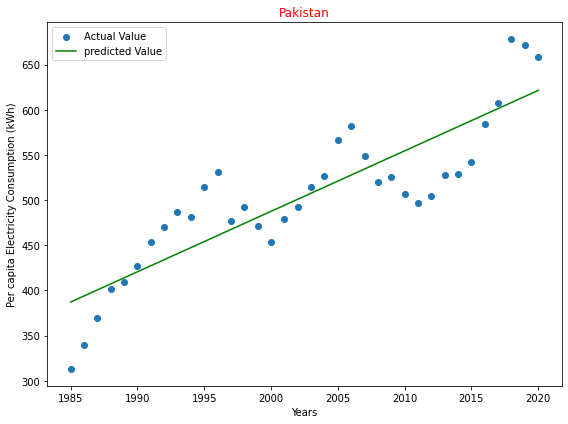

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,label="Actual Value")
plt.plot(x,pre,color='g',label="predicted Value")
plt.legend()
plt.title('Pakistan',color='r')
plt.xlabel('Years')
plt.ylabel('Per capita Electricity Consumption (kWh)')
plt.tight_layout()
plt.show()

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
years = [2025,2026,2027,2028,2029]
for i in years:
    print(linReg.predict([[i]]))

[654.94376963]
[661.6400668]
[668.33636396]
[675.03266113]
[681.7289583]


In [16]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y,linReg.predict(x)))

1635.691923213005
